# Time Series :
    A sequential set of data points measured over time.  
    x(t), t- variable that repersents the elapsed time and t=0,1,2,3,....
### How Time Series is special? 
    It is time dependent. So basic assumption of regression/classification model that the observations are independent doesn't hold in this. 

### Examples:
    Daily temperature
    monthly rain fall
    daily closing price of company stock
    continuous monitoring of a person's heart rate. 

# Auto Regression
    A linear model that uses the dependent relationship between an observation and some number of lagged observations.
    
\begin{equation*}
X_t=\phi_1 X_{t-1}+\phi_2 X_{t-1}....\phi_p X_{t-p}+ w_t \\
X_t= \sum_{i=1}^p \phi_i X_{t-i} + w_t \\
w_t : white noise \sim wn(0,\sigma _w ^2)
\end{equation*}

p : hyper parameter that repersents the length of the direct look back in the series

## Q1) Genarate a time series of 1000 data points with following AR(p) models.
1. AR(0) with $\sigma_w^2=0.3$
2. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.3$
3. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.9$
4. AR(2) with $\sigma_w^2=0.3 , \phi_1=0.4, \phi_2=0.4$
5. AR(2) with $\sigma_w^2=0.3 , \phi_1=0.4, \phi_2=-0.4$


Visualize all 5 time series using subplots and give proper legends and titles. 

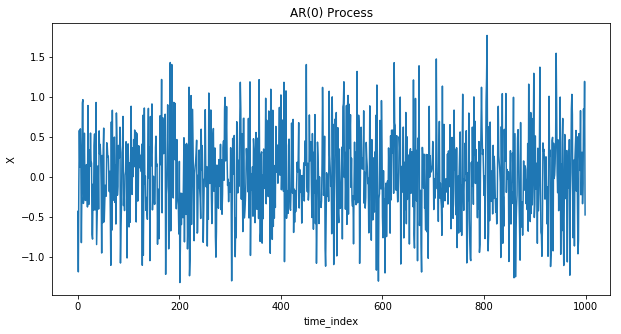

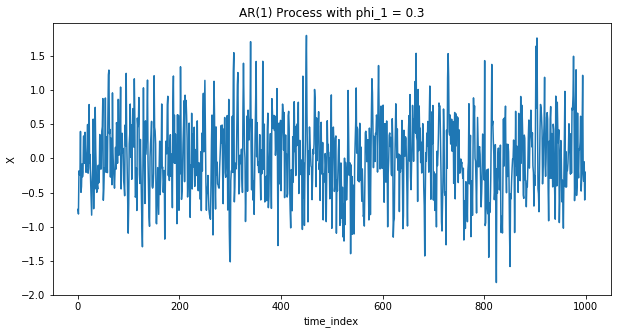

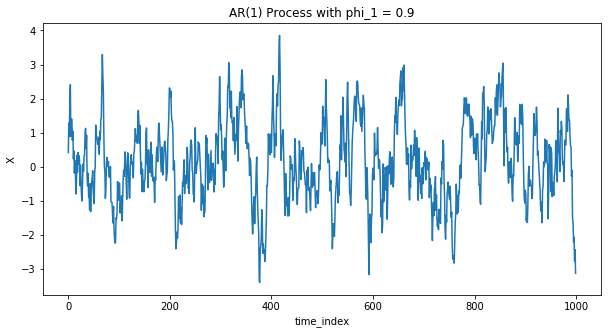

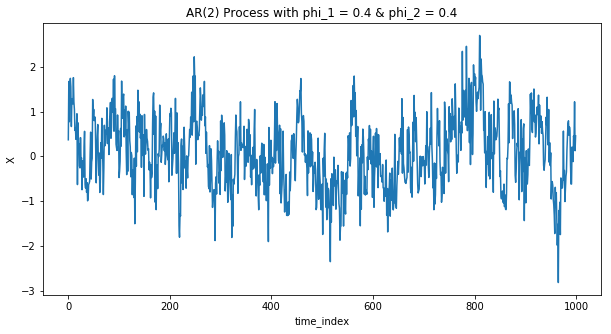

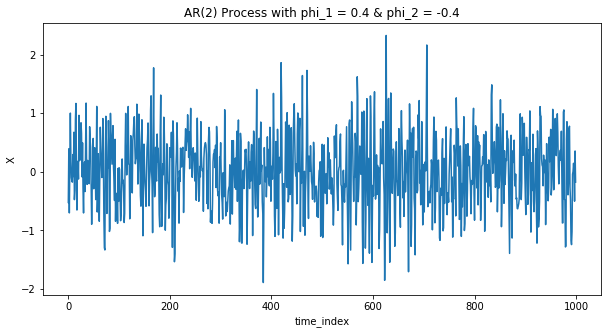

In [8]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
# AR(0) process
sigma_w = np.sqrt(0.3)
X_ts = np.random.normal(mu, sigma_w, 1000)
# visualization
X_range = np.arange(1000)
plt.figure(figsize=(10,5))
plt.plot(X_range, X_ts)
plt.title('AR(0) Process')
plt.ylabel('X')
plt.xlabel('time_index')
plt.show()

# AR(1) process with sigma^2 = 0.3 and both conditions of phi_1
phi_1 = [0.3, 0.9]
for k in range(len(phi_1)):
    X_ts_1 = np.zeros((1000, 1))
    X_ts_1[0] = np.random.normal(mu, sigma_w, 1)
    for i in range(1, 1000):
        X_ts_1[i] = (phi_1[k] * X_ts_1[i-1]) + np.random.normal(mu,sigma_w, 1)
    plt.figure(figsize=(10,5))
    plt.plot(X_range, X_ts_1)
    plt.title('AR(1) Process with phi_1 = {}'.format(phi_1[k]))
    plt.ylabel('X')
    plt.xlabel('time_index')
    plt.show()   


# AR(2) process with sigma^2 = 0.3 and both conditions of phi_1 and phi_2
phi_21 = 0.4
phi_22 = [0.4, -0.4]
for j in phi_22:
    X_ts_2 = np.zeros((1000,1))
    X_ts_2[0] = np.random.normal(mu,sigma_w, 1)
    X_ts_2[1] = np.random.normal(mu, sigma_w, 1)
    for i in range(2, 1000):
        X_ts_2[i] = (phi_21 * X_ts_2[i-1]) + (j * X_ts_2[i-2]) + np.random.normal(mu,sigma_w, 1)

    plt.figure(figsize=(10,5))
    plt.plot(X_range, X_ts_2)
    plt.title('AR(2) Process with phi_1 = 0.4 & phi_2 = {}'.format(j))
    plt.ylabel('X')
    plt.xlabel('time_index')
    plt.show()


## Q2)  Genarate a time series of 1000 data points with following AR(p) models.
1. AR(1) with $\sigma_w^2=0.3 , \phi_1=1.005$
2. AR(1) with $\sigma_w^2=0.3 , \phi_1=-1.005$



Visualize the time series using subplots and give proper legends and titles. 
State how it is different from times series generated from Q1.

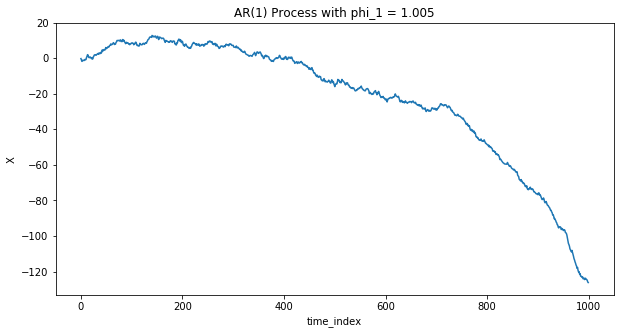

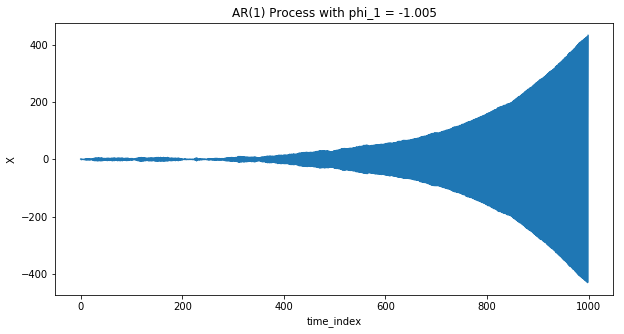

In [10]:
phi_1 = [1.005 , -1.005]
mu = 0
sigma_w = np.sqrt(0.3)

for k in range(len(phi_1)):
    X_ts_1 = np.zeros((1000, 1))
    X_ts_1[0] = np.random.normal(mu, sigma_w, 1)
    for i in range(1, 1000):
        X_ts_1[i] = (phi_1[k] * X_ts_1[i-1]) + np.random.normal(mu,sigma_w, 1)
    plt.figure(figsize=(10,5))
    plt.plot(X_range, X_ts_1)
    plt.title('AR(1) Process with phi_1 = {}'.format(phi_1[k]))
    plt.ylabel('X')
    plt.xlabel('time_index')
    plt.show()   
    

## Q3) Generate AR(1)  time series of 1000 data points with following parameters and visualize their autocovariance. 
1. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.1$
2. AR(1) with $\sigma_w^2=0.3 , \phi_1=0.8$
3. AR(1) with $\sigma_w^2=0.3 , \phi_1=-0.4$

## Auto covariance: 
 
$Cov(X_t, X_{t-k})=E[(X_t - \mu)(X_{t-k} -\mu)]$ <br>

$ Cov(X_t, X_{t-k})=\frac {1}{(N-1)} \sum_{i=0}^{N-k} ( x_i - \mu )( x_{i+k} - \mu )$ <br>

To identify the dominant periods in the time series.


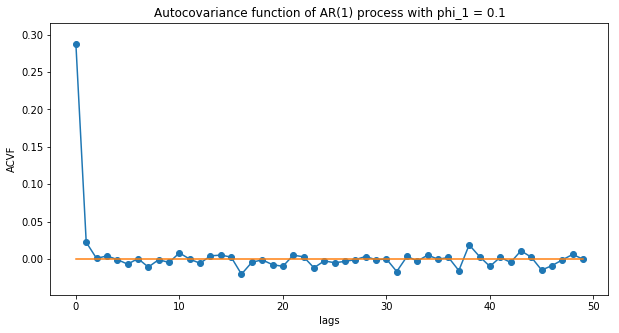

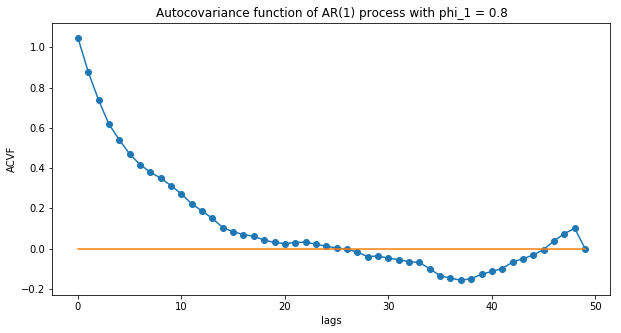

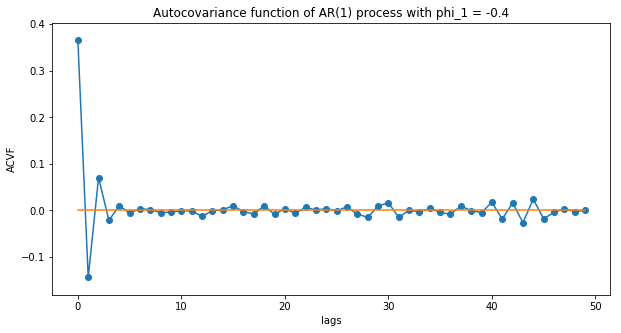

In [11]:
phi_1 = [0.1, 0.8, -0.4]
mu = 0
sigma_w = np.sqrt(0.3)

# function to calculate autocovariance at different lags
def autocovariance(sig, lag, mu):
    s = 0
    n = len(sig)
    for i in range(len(sig)-lag):
        s += (sig[i] - mu)*(sig[i+lag] - mu)
    return s/(n-1)
        

for k in range(len(phi_1)):
    X_ts_1 = np.zeros((1000, 1))
    cov_X_ts_1 = np.zeros((50,1))
    X_ts_1[0] = np.random.normal(mu, sigma_w, 1)
    # generating the AR(1) process
    for i in range(1, 1000):
        X_ts_1[i] = (phi_1[k] * X_ts_1[i-1]) + np.random.normal(mu,sigma_w, 1)
    # computing covariance of the signal at different lags from (0 to 50)
    for j in range(cov_X_ts_1.shape[0] - 1):
        cov_X_ts_1[j] = autocovariance(X_ts_1, j, mu)   
    plt.figure(figsize=(10,5))
    plt.scatter(np.arange(50), cov_X_ts_1)
    plt.plot(np.arange(50), cov_X_ts_1)
    plt.plot(np.arange(50), [0]*50)
    plt.title('Autocovariance function of AR(1) process with phi_1 = {}'.format(phi_1[k]))
    plt.ylabel('ACVF')
    plt.xlabel('lags')
    plt.show()   

## Q4) Given an AR(1) model try to find its $\phi$. 
Dataset : ar_1.csv <br>
Noise  : $W_t \sim N(0,0.3)$ <br>
$X_t=\phi_1 X_{t-1}+ w_t$ <br>
Compute the $\phi$


In [12]:
# estimating the autocovariance function at lag = 1
import pandas as pd
ar_df = pd.read_csv('ar_1.csv')
sigma = 0.3
ts_dat_mat = ar_df.Data.values
# calculating autocovariance at lag-0 and lag-1
acov_0 = autocovariance(ts_dat_mat, 0, 0)
acov_1 = autocovariance(ts_dat_mat, 1, 0)
acf_1 = acov_1/acov_0
print("The value of phi_1 is :", acf_1)

The value of phi_1 is : 0.8275946243575595


## Q5) Try to fit and forcast time series for a given real time data set using inbuilt ar library. 
Dataset : Electricity_comsumption_hourly.csv
Predict last 12 data points and compare with the actual data point. 

Train anf test data :

X=data['DEOK_MW'].values <br>
train, test = X[1:len(X)-12], X[len(X)-12:]

Inbuilt AR function : from statsmodels.tsa.ar_model import AR

In [13]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
elec_cons_df = pd.read_csv('Electricity_comsumption_hourly.csv')
X = elec_cons_df['DEOK_MW'].values
train, test = X[1: len(X)-12], X[(len(X)- 12):]
ar_mod = AR(train)
fit = ar_mod.fit()
pred_values = fit.predict(start = len(train), end = len(train)+len(test)-1)
print('The actual values are:', test)
print('\nThe predicted values are:\n',pred_values)
print("\nThe MSE on the test data is: ", mean_squared_error(test, pred_values))

The actual values are: [3865. 3824. 3766. 3776. 3885. 4200. 4393. 4426. 4419. 4355. 4224. 4100.]

The predicted values are:
 [3869.47213749 3805.97374539 3796.57597825 3797.10851529 3890.59866125
 4097.28686724 4260.15185433 4310.203028   4307.50118508 4252.26119662
 4146.98435624 4053.06780557]

The MSE on the test data is:  6207.13288515176
